In [3]:
"""
Full code for running a game of tic-tac-toe on a 3 by 3 board.
Two players take turns making moves on squares of the board, the first to get 3 in a row, including diagonals, wins. If
there are no valid moves left to make the game ends a draw.
The main method to use here is play_game which simulates a game to the end using the function args it takes to determine
where each player plays.
The board is represented by a 3 x 3 tuple of ints. A 0 means no player has played in a space, 1 means player one has
played there, -1 means the seconds player has played there. The apply_move method can be used to return a copy of a
given state with a given move applied. This can be useful for doing min-max or monte carlo sampling.
"""
"""
player functions to use in play_game method:
random_player - randomly chooses from available moves
human_player - takes keyboard input to choose from the list of available moves
min_max_player - runs the min-max algorithm to choose the best available move
make_move - player trained with reinforced learning
"""
import random
import itertools
import numpy as np

def _new_board():
    """Return a emprty tic-tac-toe board we can use for simulating a game.
    Returns:
        3x3 tuple of ints
    """
    return ((0, 0, 0),
            (0, 0, 0),
            (0, 0, 0))


def apply_move(board_state, move, side):
    """Returns a copy of the given board_state with the desired move applied.
    Args:
        board_state (3x3 tuple of int): The given board_state we want to apply the move to.
        move (int, int): The position we want to make the move in.
        side (int): The side we are making this move for, 1 for the first player, -1 for the second player.
    Returns:
        (3x3 tuple of int): A copy of the board_state with the given move applied for the given side.
    """
    move_x, move_y = move

    def get_tuples():
        for x in range(3):
            if move_x == x:
                temp = list(board_state[x])
                temp[move_y] = side
                yield tuple(temp)
            else:
                yield board_state[x]

    return tuple(get_tuples())


def available_moves(board_state):
    """Get all legal moves for the current board_state. For Tic-tac-toe that is all positions that do not currently have
    pieces played.
    Args:
        board_state: The board_state we want to check for valid moves.
    Returns:
        Generator of (int, int): All the valid moves that can be played in this position.
    """
    for x, y in itertools.product(range(3), range(3)):
        if board_state[x][y] == 0:
            yield (x, y)


def _has_3_in_a_line(line):
    return all(x == -1 for x in line) | all(x == 1 for x in line)


def has_winner(board_state):
    """Determine if a player has won on the given board_state.
    Args:
        board_state (3x3 tuple of int): The current board_state we want to evaluate.
    Returns:
        int: 1 if player one has won, -1 if player 2 has won, otherwise 0.
    """
    # check rows
    for x in range(3):
        if _has_3_in_a_line(board_state[x]):
            return board_state[x][0]
    # check columns
    for y in range(3):
        if _has_3_in_a_line([i[y] for i in board_state]):
            return board_state[0][y]

    # check diagonals
    if _has_3_in_a_line([board_state[i][i] for i in range(3)]):
        return board_state[0][0]
    if _has_3_in_a_line([board_state[2 - i][i] for i in range(3)]):
        return board_state[0][2]

    return 0  # no one has won, return 0 for a draw


def print_board(board_state,move):
  for i in range (len(board_state)):
    for j in range (len(board_state[0])):
      if(move[0]==i and move[1]==j):
        print("\033[1;33m%s" %board_state[i][j], end = '  ')
      else:
        print("\033[1;30m%s" %board_state[i][j], end = '  ')
    print("\n")

def play_game(plus_player_func, minus_player_func, log=0):
    """Run a single game of tic-tac-toe until the end, using the provided function args to determine the moves for each
    player.
    Args:
        plus_player_func ((board_state(3 by 3 tuple of int), side(int)) -> move((int, int))): Function that takes the
            current board_state and side this player is playing, and returns the move the player wants to play.
        minus_player_func ((board_state(3 by 3 tuple of int), side(int)) -> move((int, int))): Function that takes the
            current board_state and side this player is playing, and returns the move the player wants to play.
        log (int): If 1 or 2 progress is logged to console, defaults to 0
    Returns:
        int: 1 if the plus_player_func won, -1 if the minus_player_func won and 0 for a draw
    """
    board_state = _new_board()
    player_turn = 1

    while True:
        _available_moves = list(available_moves(board_state))

        if len(_available_moves) == 0:
            # draw
            if log:
                print("no moves left, game ended a draw")
            return 0.
        if player_turn > 0:
            move = plus_player_func(board_state, 1)
        else:
            move = minus_player_func(board_state, -1)

        if move not in _available_moves:
            # if a player makes an invalid move the other player wins
            if log:
                print("illegal move ", move)
            return -player_turn

        board_state = apply_move(board_state, move, player_turn)
        if log==1:
            
            print_board(board_state,move)
            print("___________")

        if log==2:
            
            print(np.matrix(board_state))
            print("___________")

        winner = has_winner(board_state)
        if winner != 0:
            if log:
                print("we have a winner, side: %s" % player_turn)
            return winner
        player_turn = -player_turn

def play_games(number_of_games,plus_player_func, minus_player_func, log=0):
  #plays a given number of games and prints the win rates of the players
  results=[]
  for i in range (1,number_of_games):
    reward = play_game(plus_player_func, minus_player_func,log=0)
    results.append(reward)
  
  print("plus player win_rate: %s" % (0.5 + sum(results) / (number_of_games * 2.)))
  print("minus player win_rate: %s" % (0.5 + (-1)*sum(results) / (number_of_games * 2.)))

def random_player(board_state, _):
    """A player func that can be used in the play_game method. Given a board state it chooses a move randomly from the
    valid moves in the current state.
    Args:
        board_state (3x3 tuple of int): The current state of the board
        _: the side this player is playing, not used in this function because we are simply choosing the moves randomly
    Returns:
        (int, int): the move we want to play on the current board
    """
    moves = list(available_moves(board_state))
    move = random.choice(moves)
    print(move)
    return move

def random_player_illegal(board_state, _):
    """A player func that can be used in the play_game method. Given a board state it chooses a move randomly from the
    valid moves in the current state.
    Args:
        board_state (3x3 tuple of int): The current state of the board
        _: the side this player is playing, not used in this function because we are simply choosing the moves randomly
    Returns:
        (int, int): the move we want to play on the current board
    """
    moves = []
    for i in range (3):
      for j in range (3):
        moves.append((i,j))
    return random.choice(moves)



def human_player(board_state,side):
    moves = list(available_moves(board_state))
    print(moves)
    move=int(input())
    return(moves[move])

if __name__ == '__main__':
    # example of playing a game
    play_game(min_max_player, random_player, log=2)


[[1 0 0]
 [0 0 0]
 [0 0 0]]
___________
(2, 0)
[[ 1  0  0]
 [ 0  0  0]
 [-1  0  0]]
___________
[[ 1  1  0]
 [ 0  0  0]
 [-1  0  0]]
___________
(2, 1)
[[ 1  1  0]
 [ 0  0  0]
 [-1 -1  0]]
___________
[[ 1  1  1]
 [ 0  0  0]
 [-1 -1  0]]
___________
we have a winner, side: 1


In [ ]:
#policy_gradient


import time
import collections
import numpy as np
import tensorflow as tf
tf.compat.v1.disable_eager_execution()
print(tf.__version__)

HIDDEN_NODES = (100, 100, 100)  # number of hidden layer neurons
INPUT_NODES = 3 * 3  # board size
BATCH_SIZE = 100  # every how many games to do a parameter update?
LEARN_RATE = 1e-4
OUTPUT_NODES = INPUT_NODES
PRINT_RESULTS_EVERY_X = 1000  # every how many games to print the results
WEIGHTS_SAVED = False # if True starts from pre saved weights, if False starts with random weights
ILLEGAL_MOVES_ALLOWED = True
   
input_placeholder = tf.compat.v1.placeholder("float", shape=(None, INPUT_NODES))
reward_placeholder = tf.compat.v1.placeholder("float", shape=(None,))
actual_move_placeholder = tf.compat.v1.placeholder("float", shape=(None, OUTPUT_NODES))

if (WEIGHTS_SAVED==False):
  hidden_weights_1 = tf.Variable(tf.random.truncated_normal((INPUT_NODES, HIDDEN_NODES[0]), stddev=1. / np.sqrt(INPUT_NODES)))   #random values from a normal distribution
  hidden_weights_2 = tf.Variable(
      tf.random.truncated_normal((HIDDEN_NODES[0], HIDDEN_NODES[1]), stddev=1. / np.sqrt(HIDDEN_NODES[0])))
  hidden_weights_3 = tf.Variable(
      tf.random.truncated_normal((HIDDEN_NODES[1], HIDDEN_NODES[2]), stddev=1. / np.sqrt(HIDDEN_NODES[1]))) 
  output_weights = tf.Variable(tf.random.truncated_normal((HIDDEN_NODES[-1], OUTPUT_NODES), stddev=1. / np.sqrt(OUTPUT_NODES)))

  bias_1 = tf.Variable(tf.constant(0.01, shape=(HIDDEN_NODES[0],)))
  bias_2 = tf.Variable(tf.constant(0.01, shape=(HIDDEN_NODES[1],)))
  bias_3 = tf.Variable(tf.constant(0.01, shape=(HIDDEN_NODES[2],)))
  bias_4 = tf.Variable(tf.constant(0.01, shape=(OUTPUT_NODES,)))
else:
    %store -r saved_weights
    hidden_weights_1 = tf.Variable(saved_weights[0])  #saved values
    hidden_weights_2 = tf.Variable(saved_weights[1])
    hidden_weights_3 = tf.Variable(saved_weights[2])
    output_weights = tf.Variable(saved_weights[3])

    bias_1 = tf.Variable(saved_weights[4])
    bias_2 = tf.Variable(saved_weights[5])
    bias_3 = tf.Variable(saved_weights[6])
    bias_4 = tf.Variable(saved_weights[7])
    
    #other neural network for saved player
    saved_input_placeholder = tf.compat.v1.placeholder("float", shape=(None, INPUT_NODES))

    %store -r saved_weights
    saved_hidden_weights_1 = tf.Variable(saved_weights[0])  #saved values
    saved_hidden_weights_2 = tf.Variable(saved_weights[1])
    saved_hidden_weights_3 = tf.Variable(saved_weights[2])
    saved_output_weights = tf.Variable(saved_weights[3])

    saved_bias_1 = tf.Variable(saved_weights[4])
    saved_bias_2 = tf.Variable(saved_weights[5])
    saved_bias_3 = tf.Variable(saved_weights[6])
    saved_bias_4 = tf.Variable(saved_weights[7])

    saved_hidden_layer_1 = tf.nn.relu(tf.matmul(saved_input_placeholder, saved_hidden_weights_1) + saved_bias_1)
    saved_hidden_layer_2 = tf.nn.relu(tf.matmul(saved_hidden_layer_1, saved_hidden_weights_2) + saved_bias_2)
    saved_hidden_layer_3 = tf.nn.relu(tf.matmul(saved_hidden_layer_2, saved_hidden_weights_3) + saved_bias_3)
    saved_output_layer = tf.nn.softmax(tf.matmul(saved_hidden_layer_3, saved_output_weights) + saved_bias_4)

hidden_layer_1 = tf.nn.relu(tf.matmul(input_placeholder, hidden_weights_1) + bias_1)
hidden_layer_2 = tf.nn.relu(tf.matmul(hidden_layer_1, hidden_weights_2) + bias_2)
hidden_layer_3 = tf.nn.relu(tf.matmul(hidden_layer_2, hidden_weights_3) + bias_3)
output_layer = tf.nn.softmax(tf.matmul(hidden_layer_3, output_weights) + bias_4)




policy_gradient = tf.reduce_sum(input_tensor=tf.reshape(reward_placeholder, (-1, 1)) * actual_move_placeholder * output_layer)
train_step = tf.compat.v1.train.AdamOptimizer(LEARN_RATE).minimize(-policy_gradient)

sess = tf.compat.v1.Session()
sess.run(tf.compat.v1.initialize_all_variables())


board_states, actual_moves, rewards = [], [], []
episode_number = 1
results = collections.deque()


def move_transform(move):
# transforms a list with n^2 length into a nxn matrix
    move_index = list(move).index(1)
    return (move_index - (move_index % 3))/3, move_index % 3

def make_move(board_state, side):
    board_state_flat = np.ravel(board_state)
    board_states.append(board_state_flat)
    probability_of_actions = sess.run(output_layer, feed_dict={input_placeholder: [board_state_flat]})[0]



    # we choose new moves until the move is allowed in the current board state.
    while(True):

        try:
            move = np.random.multinomial(1, probability_of_actions)

        except ValueError:
            # sometimes because of rounding errors we end up with probability_of_actions summing to greater than 1.
            # so need to reduce slightly to be a valid value
            
            move = np.random.multinomial(1, probability_of_actions / (sum(probability_of_actions) + 1e-7))

        if ILLEGAL_MOVES_ALLOWED==True:
            break
        
        if(move_transform(move) in (list(available_moves(board_state)))):
          break
        
        # we don't allow to choose the same move again, by changing its probability to 0
        probability_of_actions[list(move).index(1)]=0
        if sum(probability_of_actions)==0:
          break
        probability_of_actions=probability_of_actions*(1/sum(probability_of_actions))
    
    actual_moves.append(move)


    return move_transform(move)



def policy_gradient_player(board_state, side):
# Chooses the move with the highest probability instead of randomly choosing
    
    board_state_flat = np.ravel(board_state)
    board_states.append(board_state_flat)
    probability_of_actions = sess.run(output_layer, feed_dict={input_placeholder: [board_state_flat]})[0]

    move=[0]*9
    move[list(probability_of_actions).index(max(list(probability_of_actions)))] = 1


    # we choose new moves until the move is allowed in the current board state.
    while(move_transform(move) not in (list(available_moves(board_state)))):

        # we don't allow to choose the same move again, by changing its probability to 0
        probability_of_actions[list(move).index(1)]=0
        
        if ILLEGAL_MOVES_ALLOWED==True:
            break
        
        if sum(probability_of_actions)==0:
          break       
        probability_of_actions=probability_of_actions*(1/sum(probability_of_actions))

        move=[0]*9
        move[list(probability_of_actions).index(max(list(probability_of_actions)))] = 1



    actual_moves.append(move)


    return move_transform(move)

def saved_player(board_state, side):
# Chooses the move with the highest probability instead of randomly choosing
    
    board_state_flat = np.ravel(board_state)
    board_states.append(board_state_flat)
    probability_of_actions = sess.run(saved_output_layer, feed_dict={saved_input_placeholder: [board_state_flat]})[0]

    # we choose new moves until the move is allowed in the current board state.
    while(True):

        try:
            move = np.random.multinomial(1, probability_of_actions)

        except ValueError:
            # sometimes because of rounding errors we end up with probability_of_actions summing to greater than 1.
            # so need to reduce slightly to be a valid value
            
            move = np.random.multinomial(1, probability_of_actions / (sum(probability_of_actions) + 1e-7))

        if ILLEGAL_MOVES_ALLOWED==True:
            break
        
        if(move_transform(move) in (list(available_moves(board_state)))):
          break
        
        # we don't allow to choose the same move again, by changing its probability to 0
        probability_of_actions[list(move).index(1)]=0
        if sum(probability_of_actions)==0:
          break
        probability_of_actions=probability_of_actions*(1/sum(probability_of_actions))
    
    actual_moves.append(move)


    return move_transform(move)



win_rates=[]
seconds = time.time()

while True:
    reward = play_game(make_move, random_player)
    results.append(reward)
    if len(results) > PRINT_RESULTS_EVERY_X:
        results.popleft()

    last_game_length = len(board_states) - len(rewards)

    # we scale here so winning quickly is better winning slowly and loosing slowly better than loosing quick
    reward /= float(last_game_length)

    rewards += ([reward] * last_game_length)

    episode_number += 1

    if episode_number % BATCH_SIZE == 0:
        normalized_rewards = rewards - np.mean(rewards)
        if np.std(normalized_rewards)!=0:
            normalized_rewards /= np.std(normalized_rewards)

        
            sess.run(train_step, feed_dict={input_placeholder: board_states,
                                        reward_placeholder: normalized_rewards,
                                        actual_move_placeholder: actual_moves})

            # clear batches
            del board_states[:]
            del actual_moves[:]
            del rewards[:]


    if episode_number % PRINT_RESULTS_EVERY_X == 0:
        print("episode: %s win_rate: %s                                     Time elapsed : %s" % (episode_number, 0.5 + sum(results) / (PRINT_RESULTS_EVERY_X * 2.), round(time.time()-seconds,3) ))
        seconds = time.time()
        win_rates.append((0.5 + sum(results) / (PRINT_RESULTS_EVERY_X * 2.)))

2.3.0
Instructions for updating:
Use `tf.global_variables_initializer` instead.
episode: 1000 win_rate: 0.08100000000000002                                     Time elapsed : 0.946
episode: 2000 win_rate: 0.08450000000000002                                     Time elapsed : 0.84
episode: 3000 win_rate: 0.0695                                     Time elapsed : 0.831
episode: 4000 win_rate: 0.08450000000000002                                     Time elapsed : 0.844
episode: 5000 win_rate: 0.09699999999999998                                     Time elapsed : 0.795
episode: 6000 win_rate: 0.10199999999999998                                     Time elapsed : 0.791
episode: 7000 win_rate: 0.09499999999999997                                     Time elapsed : 0.789
episode: 8000 win_rate: 0.09499999999999997                                     Time elapsed : 0.803
episode: 9000 win_rate: 0.09350000000000003                                     Time elapsed : 0.837
episode: 10000 win_rate: 

episode: 88000 win_rate: 0.71                                     Time elapsed : 0.874
episode: 89000 win_rate: 0.7265                                     Time elapsed : 0.898
episode: 90000 win_rate: 0.723                                     Time elapsed : 0.867
episode: 91000 win_rate: 0.748                                     Time elapsed : 0.899
episode: 92000 win_rate: 0.7384999999999999                                     Time elapsed : 0.841
episode: 93000 win_rate: 0.737                                     Time elapsed : 0.899
episode: 94000 win_rate: 0.73                                     Time elapsed : 0.883
episode: 95000 win_rate: 0.751                                     Time elapsed : 0.884
episode: 96000 win_rate: 0.736                                     Time elapsed : 0.89
episode: 97000 win_rate: 0.739                                     Time elapsed : 0.884
episode: 98000 win_rate: 0.7505                                     Time elapsed : 0.863
episode: 99000 win_r

episode: 178000 win_rate: 0.881                                     Time elapsed : 0.86
episode: 179000 win_rate: 0.853                                     Time elapsed : 0.873
episode: 180000 win_rate: 0.8694999999999999                                     Time elapsed : 0.859
episode: 181000 win_rate: 0.879                                     Time elapsed : 0.84
episode: 182000 win_rate: 0.8905000000000001                                     Time elapsed : 0.877
episode: 183000 win_rate: 0.872                                     Time elapsed : 0.868
episode: 184000 win_rate: 0.879                                     Time elapsed : 0.89
episode: 185000 win_rate: 0.876                                     Time elapsed : 0.917
episode: 186000 win_rate: 0.87                                     Time elapsed : 0.866
episode: 187000 win_rate: 0.893                                     Time elapsed : 0.903
episode: 188000 win_rate: 0.869                                     Time elapsed : 0.893

episode: 269000 win_rate: 0.8805000000000001                                     Time elapsed : 0.806
episode: 270000 win_rate: 0.896                                     Time elapsed : 0.778
episode: 271000 win_rate: 0.892                                     Time elapsed : 0.803
episode: 272000 win_rate: 0.9085                                     Time elapsed : 0.892
episode: 273000 win_rate: 0.901                                     Time elapsed : 0.85
episode: 274000 win_rate: 0.893                                     Time elapsed : 0.868
episode: 275000 win_rate: 0.8985000000000001                                     Time elapsed : 0.888
episode: 276000 win_rate: 0.892                                     Time elapsed : 0.886
episode: 277000 win_rate: 0.9                                     Time elapsed : 0.893
episode: 278000 win_rate: 0.878                                     Time elapsed : 0.876
episode: 279000 win_rate: 0.901                                     Time elapsed : 0.8

episode: 359000 win_rate: 0.904                                     Time elapsed : 0.908
episode: 360000 win_rate: 0.893                                     Time elapsed : 0.895
episode: 361000 win_rate: 0.903                                     Time elapsed : 0.873
episode: 362000 win_rate: 0.896                                     Time elapsed : 0.884
episode: 363000 win_rate: 0.894                                     Time elapsed : 0.89
episode: 364000 win_rate: 0.9045000000000001                                     Time elapsed : 0.861
episode: 365000 win_rate: 0.9                                     Time elapsed : 0.838
episode: 366000 win_rate: 0.9045000000000001                                     Time elapsed : 0.849
episode: 367000 win_rate: 0.9139999999999999                                     Time elapsed : 0.858
episode: 368000 win_rate: 0.898                                     Time elapsed : 0.894
episode: 369000 win_rate: 0.9079999999999999                              

episode: 449000 win_rate: 0.894                                     Time elapsed : 0.896
episode: 450000 win_rate: 0.9135                                     Time elapsed : 0.875
episode: 451000 win_rate: 0.9005000000000001                                     Time elapsed : 0.909
episode: 452000 win_rate: 0.904                                     Time elapsed : 0.877
episode: 453000 win_rate: 0.899                                     Time elapsed : 0.859
episode: 454000 win_rate: 0.897                                     Time elapsed : 0.891
episode: 455000 win_rate: 0.909                                     Time elapsed : 0.882
episode: 456000 win_rate: 0.9085                                     Time elapsed : 0.875
episode: 457000 win_rate: 0.911                                     Time elapsed : 0.881
episode: 458000 win_rate: 0.9125                                     Time elapsed : 0.87
episode: 459000 win_rate: 0.88                                     Time elapsed : 0.869
episode

episode: 539000 win_rate: 0.901                                     Time elapsed : 0.879
episode: 540000 win_rate: 0.9                                     Time elapsed : 0.869
episode: 541000 win_rate: 0.9165                                     Time elapsed : 0.882
episode: 542000 win_rate: 0.892                                     Time elapsed : 0.889
episode: 543000 win_rate: 0.9219999999999999                                     Time elapsed : 0.828
episode: 544000 win_rate: 0.9079999999999999                                     Time elapsed : 0.86
episode: 545000 win_rate: 0.9119999999999999                                     Time elapsed : 0.862
episode: 546000 win_rate: 0.917                                     Time elapsed : 0.869
episode: 547000 win_rate: 0.9025000000000001                                     Time elapsed : 0.865
episode: 548000 win_rate: 0.901                                     Time elapsed : 0.868
episode: 549000 win_rate: 0.899                             

episode: 628000 win_rate: 0.9195                                     Time elapsed : 0.854
episode: 629000 win_rate: 0.905                                     Time elapsed : 0.849
episode: 630000 win_rate: 0.917                                     Time elapsed : 0.839
episode: 631000 win_rate: 0.9159999999999999                                     Time elapsed : 0.847
episode: 632000 win_rate: 0.919                                     Time elapsed : 0.813
episode: 633000 win_rate: 0.907                                     Time elapsed : 0.886
episode: 634000 win_rate: 0.917                                     Time elapsed : 0.882
episode: 635000 win_rate: 0.9119999999999999                                     Time elapsed : 0.892
episode: 636000 win_rate: 0.9179999999999999                                     Time elapsed : 0.899
episode: 637000 win_rate: 0.8865000000000001                                     Time elapsed : 0.876
episode: 638000 win_rate: 0.905                          

episode: 717000 win_rate: 0.9085                                     Time elapsed : 0.895
episode: 718000 win_rate: 0.8995                                     Time elapsed : 0.86
episode: 719000 win_rate: 0.925                                     Time elapsed : 0.883
episode: 720000 win_rate: 0.907                                     Time elapsed : 0.888
episode: 721000 win_rate: 0.9219999999999999                                     Time elapsed : 0.883
episode: 722000 win_rate: 0.9065                                     Time elapsed : 0.898
episode: 723000 win_rate: 0.898                                     Time elapsed : 0.889
episode: 724000 win_rate: 0.909                                     Time elapsed : 0.863
episode: 725000 win_rate: 0.9099999999999999                                     Time elapsed : 0.822
episode: 726000 win_rate: 0.9075                                     Time elapsed : 0.858
episode: 727000 win_rate: 0.9159999999999999                                     

episode: 806000 win_rate: 0.8875                                     Time elapsed : 0.869
episode: 807000 win_rate: 0.919                                     Time elapsed : 0.862
episode: 808000 win_rate: 0.915                                     Time elapsed : 0.841
episode: 809000 win_rate: 0.9                                     Time elapsed : 0.836
episode: 810000 win_rate: 0.9099999999999999                                     Time elapsed : 0.89
episode: 811000 win_rate: 0.8945000000000001                                     Time elapsed : 0.906
episode: 812000 win_rate: 0.9179999999999999                                     Time elapsed : 0.903
episode: 813000 win_rate: 0.8985000000000001                                     Time elapsed : 0.893
episode: 814000 win_rate: 0.906                                     Time elapsed : 0.903
episode: 815000 win_rate: 0.919                                     Time elapsed : 0.885
episode: 816000 win_rate: 0.906                             

In [140]:
#Saving the weights and biases

saved_weights=[]

def save_weights(hidden_weights_1,hidden_weights_2,hidden_weights_3,output_weights,bias_1,bias_2,bias_3,bias_4):
  weights = []
  weights.append(sess.run(hidden_weights_1))
  weights.append(sess.run(hidden_weights_2))
  weights.append(sess.run(hidden_weights_3))
  weights.append(sess.run(output_weights))
  weights.append(sess.run(bias_1))
  weights.append(sess.run(bias_2))
  weights.append(sess.run(bias_3))
  weights.append(sess.run(bias_4))
  return weights

saved_weights=save_weights(hidden_weights_1,hidden_weights_2,hidden_weights_3,output_weights,bias_1,bias_2,bias_3,bias_4)

%store saved_weights


Stored 'saved_weights' (list)


In [9]:
#play a number of gaves and print winrates
play_games(1000,policy_gradient_player,random_player)

plus player win_rate: 0.9635
minus player win_rate: 0.03649999999999998


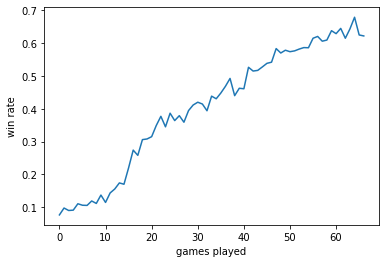

In [4]:
#plot
import matplotlib.pyplot as plt

plt.plot(win_rates)
plt.ylabel('win rate')
plt.xlabel('games played')
plt.show()


In [39]:
import sys


def _score_line(line):
    minus_count = line.count(-1)
    plus_count = line.count(1)
    if minus_count + plus_count < 3:
        if minus_count == 2:
            return -1
        elif plus_count == 2:
            return 1
    return 0


def evaluate(board_state):
    """Get a rough score for how good we think this board position is for the plus_player. Does this based on number of
    2 in row lines we have.
    Args:
        board_state (3x3 tuple of int): The board state we are evaluating
    Returns:
        int: evaluated score for the position for the plus player, posative is good for the plus player, negative good
            for the minus player
    """
    score = 0
    for x in range(3):
        score += _score_line(board_state[x])
    for y in range(3):
        score += _score_line([i[y] for i in board_state])

    # diagonals
    score += _score_line([board_state[i][i] for i in range(3)])
    score += _score_line([board_state[2 - i][i] for i in range(3)])

    return score


def min_max(board_state, side, max_depth, evaluation_func=evaluate):
    """Runs the min_max_algorithm on a given board_sate for a given side, to a given depth in order to find the best
    move
    Args:
        board_state (3x3 tuple of int): The board state we are evaluating
        side (int): either +1 or -1
        max_depth (int): how deep we want our tree to go before we use the evaluate method to determine how good the
        position is.
        evaluation_func (board_state -> int): Function used to evaluate the position for the plus player
    Returns:
        (best_score(int), best_score_move((int, int)): the move found to be best and what it's min-max score was
    """

    best_score = None
    best_score_move = None

    moves = list(available_moves(board_state))
    if not moves:
        # this is a draw
        return 0, None

    for move in moves:
        new_board_state = apply_move(board_state, move, side)
        winner = has_winner(new_board_state)
        if winner != 0:
            return winner * 10000, move
        else:
            if max_depth <= 1:
                score = evaluation_func(new_board_state)
            else:
                score, _ = min_max(new_board_state, -side, max_depth - 1)
            if side > 0:
                if best_score is None or score > best_score:
                    best_score = score
                    best_score_move = move
            else:
                if best_score is None or score < best_score:
                    best_score = score
                    best_score_move = move

    return best_score, best_score_move


def min_max_alpha_beta(board_state, side, max_depth, evaluation_func=evaluate, alpha=-sys.float_info.max,
                       beta=sys.float_info.max):
    """Runs the min_max_algorithm on a given board_sate for a given side, to a given depth in order to find the best
    move
    Args:
        board_state (3x3 tuple of int): The board state we are evaluating
        side (int): either +1 or -1
        max_depth (int): how deep we want our tree to go before we use the evaluate method to determine how good the
        position is.
        evaluation_func (board_state -> int): Function used to evaluate the position for the plus player
        alpha (float): Used when this is called recursively, normally ignore
        beta (float): Used when this is called recursively, normally ignore
    Returns:
        (best_score(int), best_score_move((int, int)): the move found to be best and what it's min-max score was
    """
    best_score_move = None
    moves = list(available_moves(board_state))
    if not moves:
        return 0, None

    for move in moves:
        new_board_state = apply_move(board_state, move, side)
        winner = has_winner(new_board_state)
        if winner != 0:
            return winner * 10000, move
        else:
            if max_depth <= 1:
                score = evaluation_func(new_board_state)
            else:
                score, _ = min_max_alpha_beta(new_board_state, -side, max_depth - 1, evaluation_func, alpha, beta)

        if side > 0:
            if score > alpha:
                alpha = score
                best_score_move = move
        else:
            if score < beta:
                beta = score
                best_score_move = move
        if alpha >= beta:
            break

    return alpha if side > 0 else beta, best_score_move


def min_max_player(board_state, side):
    return min_max(board_state, side, 10000)[1]

def min_max_player_alpha_beta(board_state, side):
    return min_max_alpha_beta(board_state, side, 10000)[1]

In [45]:
import time
start_time = time.time()
play_game(min_max_player, random_player, log=2)
elapsed_time = time.time() - start_time
print(elapsed_time)


start_time = time.time()
play_game(min_max_player_alpha_beta, random_player, log=2)
elapsed_time = time.time() - start_time
print(elapsed_time)

[[1 0 0]
 [0 0 0]
 [0 0 0]]
___________
(1, 2)
[[ 1  0  0]
 [ 0  0 -1]
 [ 0  0  0]]
___________
[[ 1  0  1]
 [ 0  0 -1]
 [ 0  0  0]]
___________
(0, 1)
[[ 1 -1  1]
 [ 0  0 -1]
 [ 0  0  0]]
___________
[[ 1 -1  1]
 [ 0  1 -1]
 [ 0  0  0]]
___________
(2, 1)
[[ 1 -1  1]
 [ 0  1 -1]
 [ 0 -1  0]]
___________
[[ 1 -1  1]
 [ 0  1 -1]
 [ 1 -1  0]]
___________
we have a winner, side: 1
3.095616579055786
[[1 0 0]
 [0 0 0]
 [0 0 0]]
___________
(1, 1)
[[ 1  0  0]
 [ 0 -1  0]
 [ 0  0  0]]
___________
[[ 1  1  0]
 [ 0 -1  0]
 [ 0  0  0]]
___________
(2, 0)
[[ 1  1  0]
 [ 0 -1  0]
 [-1  0  0]]
___________
[[ 1  1  1]
 [ 0 -1  0]
 [-1  0  0]]
___________
we have a winner, side: 1
0.19741582870483398
